In [5]:
# 파일 확인 ( ls 명령어 사용 )
%%bash

# ls -l drive/MyDrive/Colab\ Notebooks/data-files

total 831524
-rw------- 1 root root     30286 May 22  2023 auto-mpg.data
-rw------- 1 root root 851449253 Feb  8  2024 dogs-vs-cats.zip


In [6]:
# 파일 복사 ( google driver -> sample_date )
%%bash

# cp drive/MyDrive/Colab\ Notebooks/data-files/dogs-vs-cats.zip sample_data/

In [7]:
# 압축 풀기
%%bash

# mkdir sample_data/dogs-vs-cats
# unzip sample_data/dogs-vs-cats.zip -d sample_data/dogs-vs-cats/

# unzip sample_data/dogs-vs-cats.zip -d sample_data/


Archive:  sample_data/dogs-vs-cats.zip
   creating: sample_data/dogs-vs-cats/
  inflating: sample_data/__MACOSX/._dogs-vs-cats  
  inflating: sample_data/dogs-vs-cats/.DS_Store  
  inflating: sample_data/__MACOSX/dogs-vs-cats/._.DS_Store  
  inflating: sample_data/dogs-vs-cats/test1.zip  
  inflating: sample_data/__MACOSX/dogs-vs-cats/._test1.zip  
  inflating: sample_data/dogs-vs-cats/train.zip  
  inflating: sample_data/__MACOSX/dogs-vs-cats/._train.zip  


In [8]:
# 불필요한 파일 제거
%%bash
rm -rf sample_data/__MACOSX

In [10]:
# 압축 풀기 2 (하위 폴더의 train.zip, test1.zip 파일 압축 해제)
%%bash

# mkdir sample_data/dogs-vs-cats/train
# unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats/train/
# mkdir sample_data/dogs-vs-cats/test
# unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats/test/

# unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats
# unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats
# mv sample_data/dogs-vs-cats/test1 sample_data/dogs-vs-cats/test

In [ ]:
# 위 작업 일괄 처리 (파일 압축 해제)

%%bash

rm -rf sample_data/dogs-vs-cats

cp drive/MyDrive/Colab\ Notebooks/data-files/dogs-vs-cats.zip sample_data/
unzip sample_data/dogs-vs-cats.zip -d sample_data/

unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats
unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats
mv sample_data/dogs-vs-cats/test1 sample_data/dogs-vs-cats/test

rm -rf sample_data/__MACOSX

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [22]:
# 데이터 디렉터리 구성
# train_dir, test_dir, validation_dir # 훈련, 테스트, 검증 세트 폴드
# train_dir -> cats, dogs # 범주로 사용될 폴더
# test_dir -> cats, dogs
# validation_dir -> cats, dogs

import os, shutil

src_base = 'sample_data/dogs-vs-cats'
dest_base = 'sample_data/dogs-vs-cats2'

if os.path.exists(dest_base): # 이미 존재하는 폴더라면
  shutil.rmtree(dest_base)    # 폴더 제거 후
os.makedirs(dest_base)        # 새로 폴더 만들기

# train 폴더의 0 ~ 1000 : trainset,  1000 ~ 1500 : validationset, 1500 ~ 2000 : testset
for start, stop, path in zip([0, 1000, 1500], [1000, 1500, 2000], ['train', 'validation', 'test']):
  os.mkdir(os.path.join(dest_base, path)) # train or validation or test 폴더 생성
  for sub_path in ['cat', 'dog']:
    os.mkdir(os.path.join(dest_base, path, sub_path)) # train, validation, test 하위에 cats or dog 폴더 생성
    for idx in np.arange(start, stop):
      fname = f'{sub_path}.{idx}.jpg'
      shutil.copy(os.path.join(src_base, 'train', fname), os.path.join(dest_base, path, sub_path, fname))

In [23]:
# 디렉터리 구성 결과 확인
for path in ['train', 'test', 'validation']:
  for subpath in ['dog', 'cat']:
    print(path, '/', subpath, ':', len(os.listdir(f'sample_data/dogs-vs-cats2/{path}/{subpath}')))

train / dog : 1000
train / cat : 1000
test / dog : 500
test / cat : 500
validation / dog : 500
validation / cat : 500


In [24]:
# 입력 자동화 도구 만들기

# 특정 디렉터리의 파일을 읽어서 모델의 입력데이터로 변환하는 도구
train_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [25]:
# 입력 데이터 구성

datasets = []
for path, generator in zip( ['train', 'test', 'validation'],
                            [train_generator, test_generator, validation_generator]):
  dataset = generator.flow_from_directory(directory=f'sample_data/dogs-vs-cats2/{path}',
                                          target_size=(256, 256),
                                          batch_size=32,
                                          class_mode="binary")
  datasets.append(dataset)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
print( type(datasets[0]) )
for x_batch, y_batch in datasets[0]:
  print(x_batch.shape, y_batch.shape)
  print(x_batch[0].max())
  print(y_batch)
  break

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
(32, 256, 256, 3) (32,)
1.0
[0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0.]


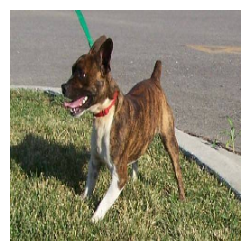

In [27]:
plt.figure(figsize=(3, 3))
plt.imshow(x_batch[4])
plt.axis('off')
plt.show()

In [ ]:
# 이미 만들어진 모델 가져오기 1
base_model = tf_keras.applications.vgg16.VGG16()

base_model.summary()

In [45]:
# 이미 만들어진 모델 가져오기 2 ( 최상위 판별층 제외 )

base_model = tf_keras.applications.vgg16.VGG16(include_top=False,
                                               weights="imagenet",
                                               input_shape=(256, 256, 3))

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

<class 'numpy.ndarray'> (256, 256, 3)
(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
(1, 8, 8, 512)


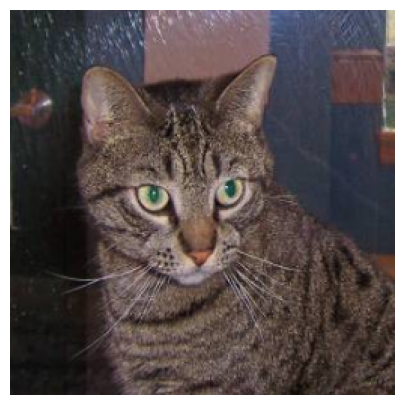

In [47]:
import cv2

cat_img = cv2.imread('sample_data/dogs-vs-cats/train/cat.1.jpg', cv2.IMREAD_COLOR) # BGR
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB) # BGR -> RGB
cat_img = cv2.resize(cat_img, (256, 256))

print( type( cat_img ), cat_img.shape )

input = cat_img.reshape(-1, 256, 256, 3) / 255.0 # ( 배치크기, 이미지데이터-shape )
print(input.shape)

predicted_value = base_model.predict(input)
print(predicted_value.shape) #

plt.figure(figsize=(5, 5))
plt.imshow(cat_img)
plt.axis('off')
plt.show()